In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import dataiku
from dataiku import pandasutils as pdu
import pandas as pd

In [4]:
img = dataiku.Folder("PSSOcropClass")
img_info=img.get_info()
img_path=img_info['path']
#data_path=img_path
#print(img_path)
#print(data_path)

imgw = dataiku.Folder("PSSO1")
imgw_info=imgw.get_info()
imgw_path=imgw_info['path']
data_path=imgw_path

out = dataiku.Folder("Outputs")
out_info=out.get_info()
out_path=out_info['path']

import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow
import splitfolders
import os
from PIL import Image,ImageOps,ImageFilter
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import io
from skimage.util import crop

import os
import scipy.fftpack
from collections import OrderedDict
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.layers import LeakyReLU,BatchNormalization,Dropout,Dense,Conv2D,Conv2DTranspose,ReLU,UpSampling2D,\
                                    Reshape,Flatten,ZeroPadding2D,Reshape,Input,Add
from tensorflow.keras.losses import MeanSquaredError
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from easydict import EasyDict as edict
from scipy.io import loadmat
from tensorflow.keras import Sequential
from tensorflow.keras.activations import tanh
from tensorflow.keras.optimizers import schedules, Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy,KLDivergence,BinaryCrossentropy,MeanSquaredError,\
                                    CategoricalCrossentropy
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.regularizers import l2
import tensorflow_hub as hub

from sklearn.cluster import KMeans,DBSCAN
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import sklearn

In [5]:
import cv2
from imutils.object_detection import non_max_suppression 
from skimage.feature import match_template
from skimage.feature import peak_local_max

In [6]:
img1_path=data_path+"/12_4_23-fail.jpg"
#img1=data_path+"/present/10_4_15-fail.png"
img1=cv2.imread(img1_path)
#img1=Image.open(img1)

#imgnp1=np.array(img1)

#imgnp1[1]
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY) 
#img1=ImageOps.grayscale(img1) 

In [7]:
img2_path=data_path+"/1_1_1-fail.jpg"
#img1=data_path+"/present/10_4_15-fail.png"
img2=cv2.imread(img2_path)
#img1=Image.open(img1)

#imgnp1=np.array(img1)

#imgnp1[1]
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY) 
#img1=ImageOps.grayscale(img1) 

In [8]:
img3_path=data_path+"/38_4_19-fail.jpg"
#img1=data_path+"/present/10_4_15-fail.png"
img3=cv2.imread(img3_path)
#img1=Image.open(img1)

#imgnp1=np.array(img1)

#imgnp1[1]
img3=cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY) 
#img1=ImageOps.grayscale(img1) 

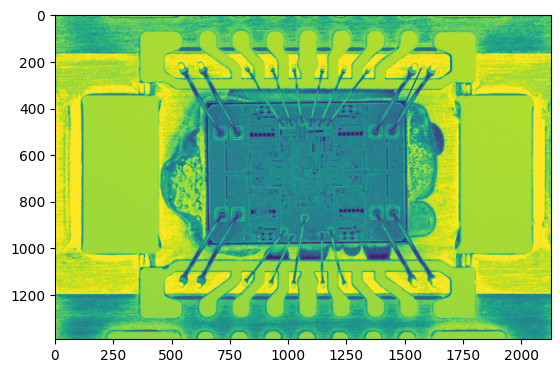

In [9]:
plt.imshow(img1)

In [10]:
im1c =img1[850:890, 1050:1090]
#im1c=cv2.resize(im1c, (30,30))

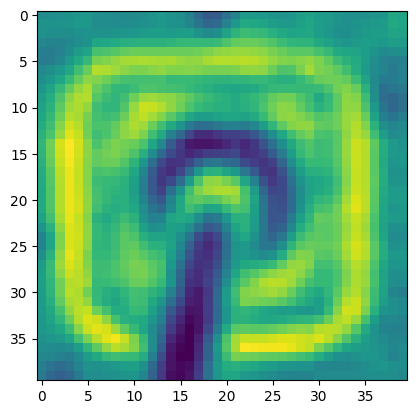

In [11]:
plt.imshow(im1c)

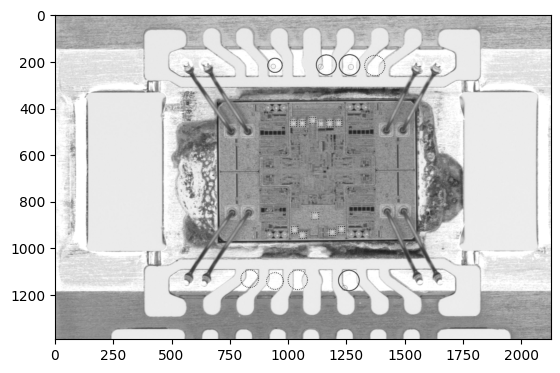

In [12]:
plt.imshow(img2, cmap="gray")

In [15]:
im2c =img2[840:890, 1085:1140]
im3c =img2[440:490, 1000:1040]

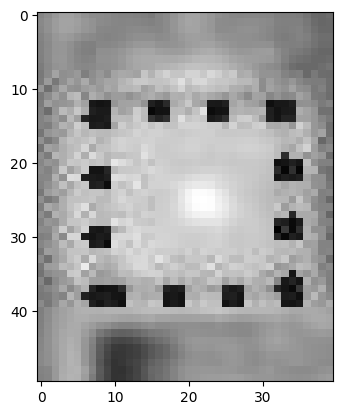

In [16]:
plt.imshow(im3c,cmap='gray')

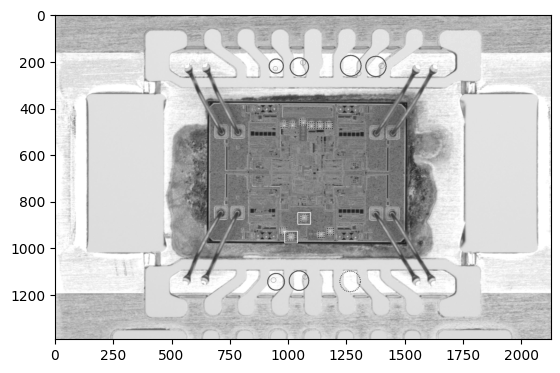

In [14]:
imgm=img3.copy()
template=im2c

thresh = 0.55
w, h = template.shape[::-1]
match = cv2.matchTemplate( 
    image=imgm, templ=template,  
  method=cv2.TM_CCOEFF_NORMED) 
  
# Select rectangles with 
# confidence greater than threshold 
(y_points, x_points) = np.where(match >= thresh) 
  
# initialize our list of rectangles 
boxes = list() 
  
# loop over the starting (x, y)-coordinates again 
for (x, y) in zip(x_points, y_points): 
    
    # update our list of rectangles 
    boxes.append((x, y, x + w, y + h)) 
boxes = non_max_suppression(np.array(boxes)) 
  
# loop over the final bounding boxes 
for (x1, y1, x2, y2) in boxes: 
    
    # draw the bounding box on the image 
    cv2.rectangle(imgm, (x1, y1), (x2, y2), 
                  (255, 0, 0), 2) 
plt.imshow(imgm,cmap='grey')

In [15]:
path=data_path+"/match1.jpg"

In [16]:
cv2.imwrite(path,imgm)

True

In [17]:
#imgm = cv2.convertScaleAbs(imgm, alpha=(255.0))

In [18]:
cv2.imwrite(path,imgm)

True

In [19]:
path

'/apps/dataiku/dss_data/managed_folders/DUMMY/Bc80Dopd/match1.jpg'

In [20]:
plt.imsave(path, imgm)

In [21]:
image = Image.fromarray(imgm)

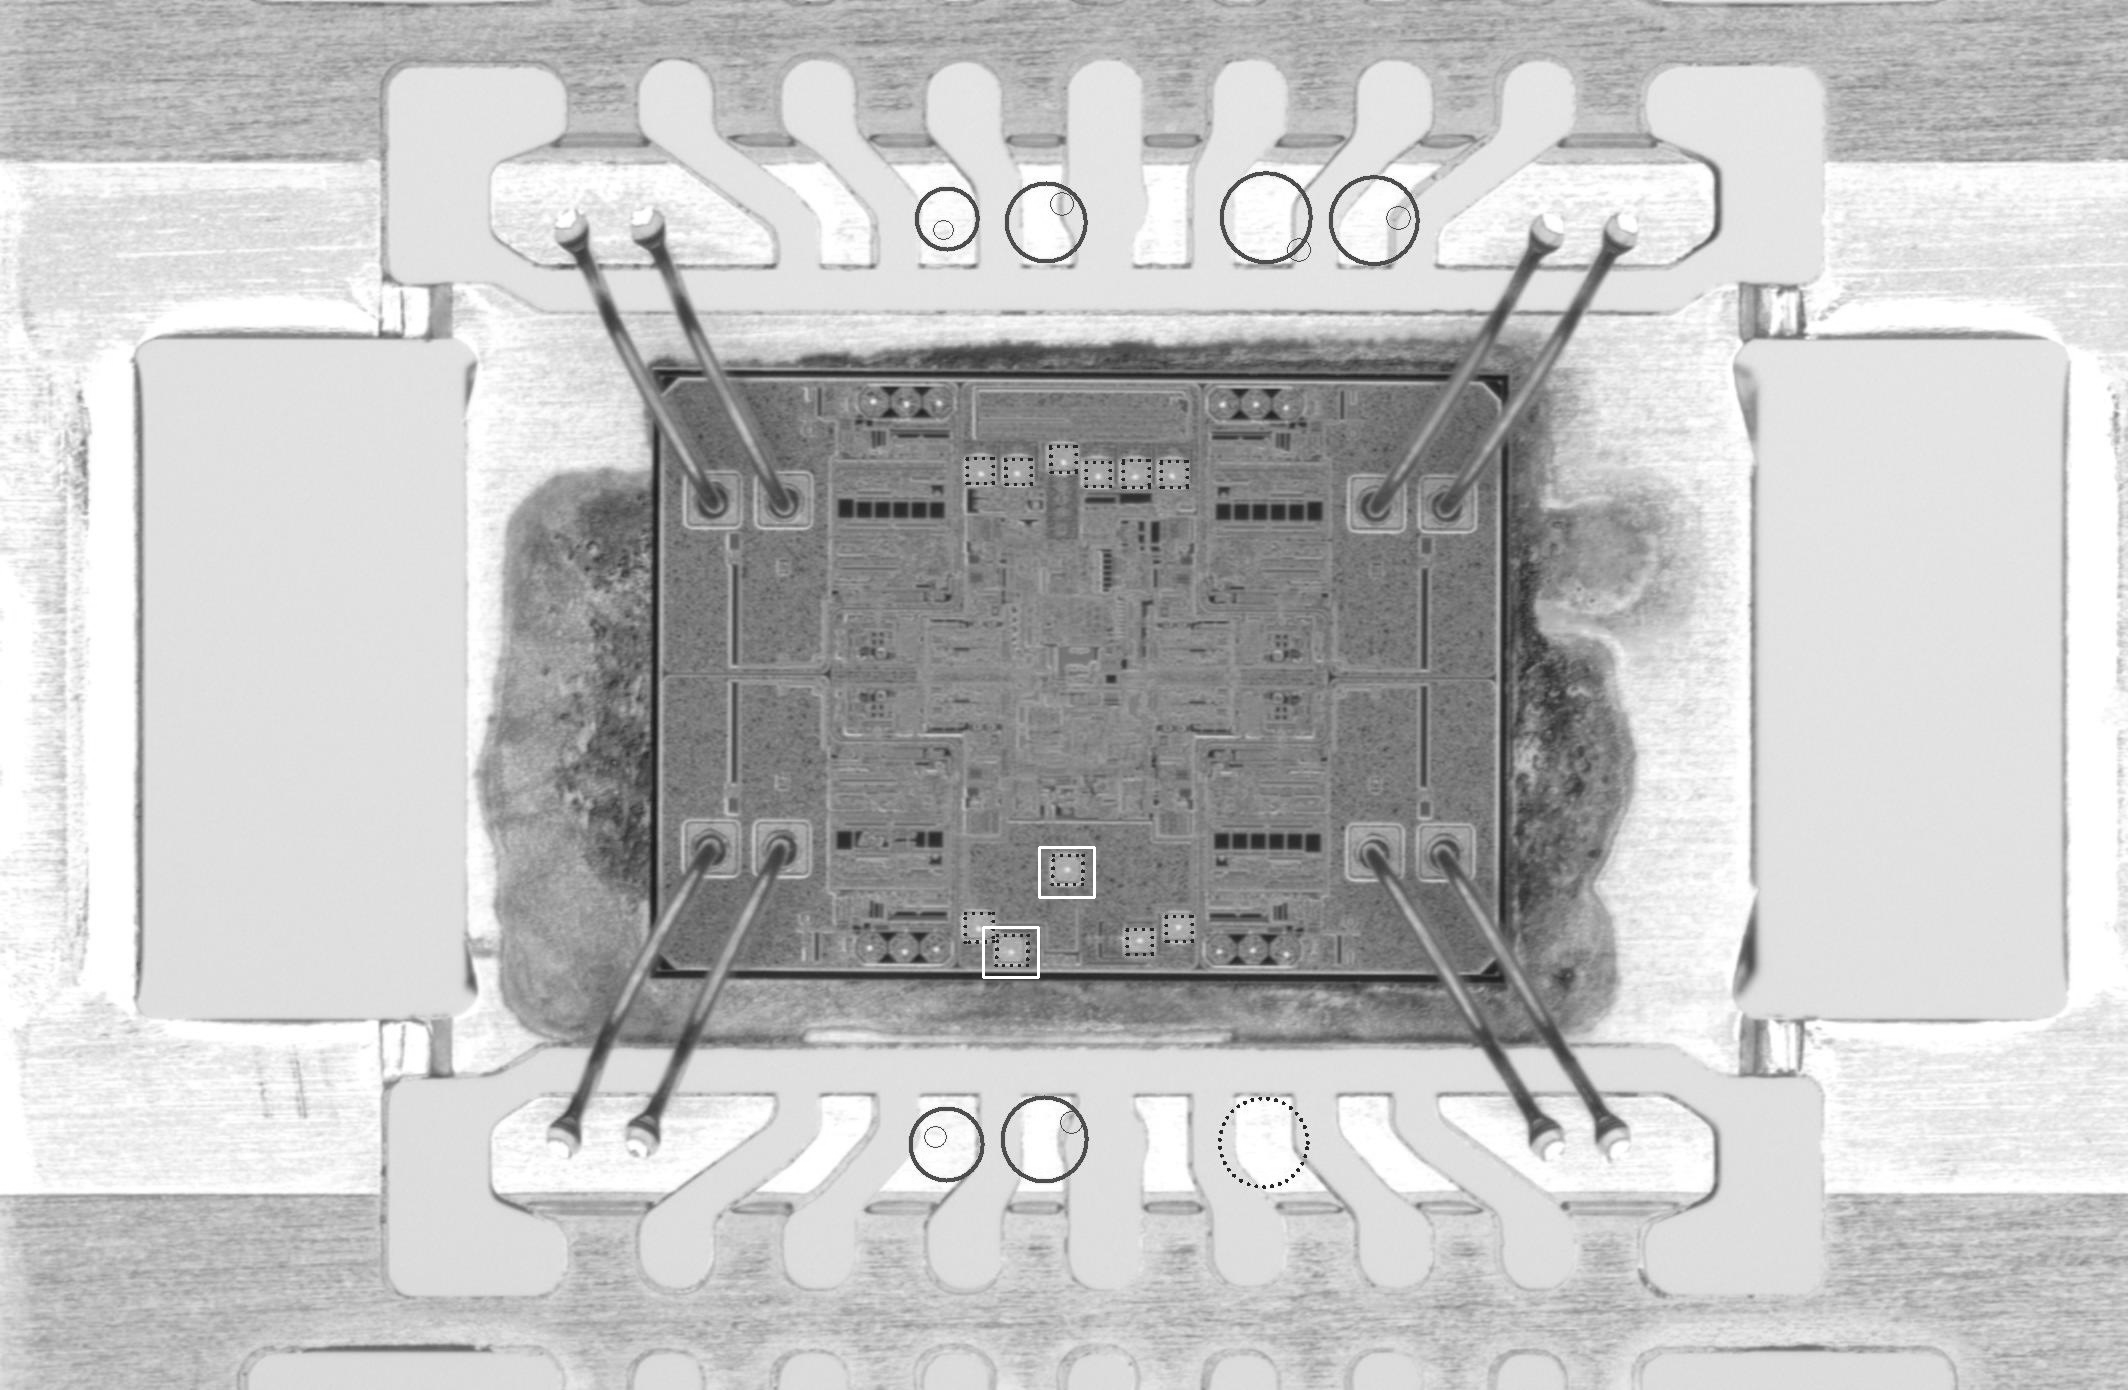

In [22]:
image

In [23]:
image.save(path,'JPEG')

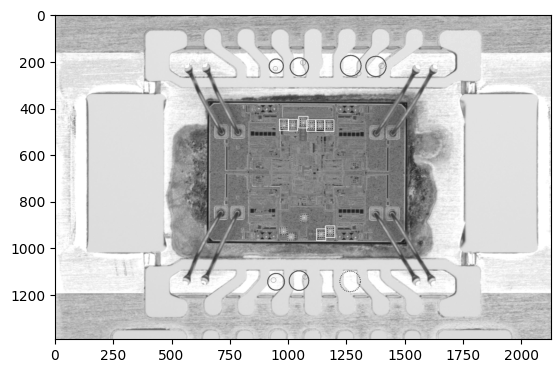

In [24]:
imgm=img3.copy()
template=im3c
thresh = 0.55
w, h = template.shape[::-1]
match = cv2.matchTemplate( 
    image=imgm, templ=template,  
  method=cv2.TM_CCOEFF_NORMED) 
  
# Select rectangles with 
# confidence greater than threshold 
(y_points, x_points) = np.where(match >= thresh) 
  
# initialize our list of rectangles 
boxes = list() 
  
# loop over the starting (x, y)-coordinates again 
for (x, y) in zip(x_points, y_points): 
    
    # update our list of rectangles 
    boxes.append((x, y, x + w, y + h)) 
boxes = non_max_suppression(np.array(boxes)) 
  
# loop over the final bounding boxes 
for (x1, y1, x2, y2) in boxes: 
    
    # draw the bounding box on the image 
    cv2.rectangle(imgm, (x1, y1), (x2, y2), 
                  (255, 0, 0), 2) 
plt.imshow(imgm,cmap='grey')

In [25]:
image = Image.fromarray(imgm)

In [26]:
image.save(data_path+"/match2.png",'PNG')

In [27]:
image = Image.fromarray(im3c)
image.save(data_path+"/template.png",'PNG')

In [28]:
#plt